In [ ]:
!pip install tensorflow==2.12.0
!pip install gradio

In [ ]:
# Import libraries
import numpy as np
import gradio as gr
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


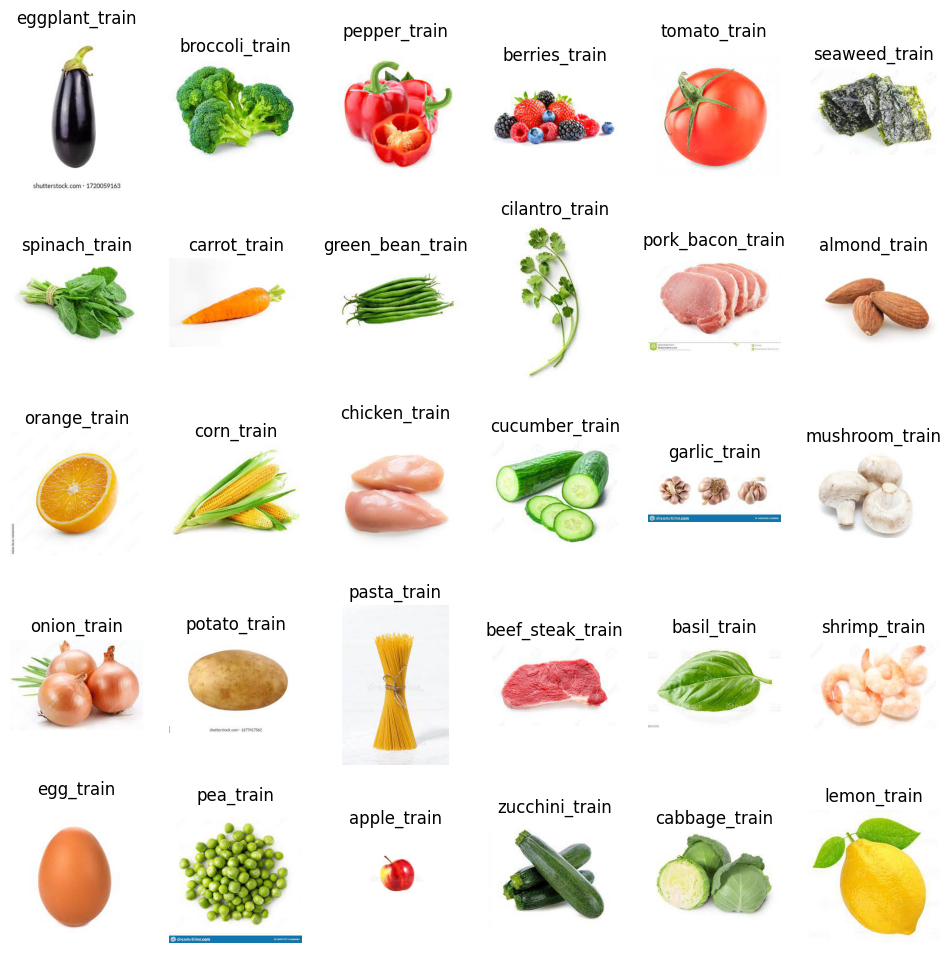

In [ ]:
train_path = "/content/drive/MyDrive/Big/img_traintestval/img_train"
validation_path = "/content/drive/MyDrive/Big/img_traintestval/img_validation"
test_path = "/content/drive/MyDrive/Big/img_traintestval/img_test"

image_categories = os.listdir('/content/drive/MyDrive/Big/img_traintestval/img_train')

def plot_images(image_categories):

    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):

        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0


        # Create Subplot and plot the images
        plt.subplot(5, 6, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')

    plt.show()

# Call the function
plot_images(image_categories)

In [ ]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=64,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=64,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=64,
                                            class_mode='categorical')

Found 17975 images belonging to 30 classes.
Found 4650 images belonging to 30 classes.
Found 4500 images belonging to 30 classes.


In [ ]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'almond_train', 1: 'apple_train', 2: 'basil_train', 3: 'beef_steak_train', 4: 'berries_train', 5: 'broccoli_train', 6: 'cabbage_train', 7: 'carrot_train', 8: 'chicken_train', 9: 'cilantro_train', 10: 'corn_train', 11: 'cucumber_train', 12: 'egg_train', 13: 'eggplant_train', 14: 'garlic_train', 15: 'green_bean_train', 16: 'lemon_train', 17: 'mushroom_train', 18: 'onion_train', 19: 'orange_train', 20: 'pasta_train', 21: 'pea_train', 22: 'pepper_train', 23: 'pork_bacon_train', 24: 'potato_train', 25: 'seaweed_train', 26: 'shrimp_train', 27: 'spinach_train', 28: 'tomato_train', 29: 'zucchini_train'}


In [ ]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(30, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator,
                 epochs=100,
                 verbose=1,
                 validation_data=val_image_generator,
                 steps_per_epoch = 17975//64,
                 validation_steps = 4650//64,
                 callbacks=early_stopping)

Epoch 1/100
280/280 [==============================] - 4942s 18s/step - loss: 2.8371 - accuracy: 0.1600 - val_loss: 2.1996 - val_accuracy: 0.3053
Epoch 2/100
280/280 [==============================] - 851s 3s/step - loss: 2.1886 - accuracy: 0.3083 - val_loss: 1.9529 - val_accuracy: 0.3898
Epoch 3/100
280/280 [==============================] - 848s 3s/step - loss: 1.9864 - accuracy: 0.3684 - val_loss: 1.8621 - val_accuracy: 0.4251
Epoch 4/100
280/280 [==============================] - 847s 3s/step - loss: 1.8206 - accuracy: 0.4281 - val_loss: 1.7644 - val_accuracy: 0.4470
Epoch 5/100
280/280 [==============================] - 849s 3s/step - loss: 1.6327 - accuracy: 0.4834 - val_loss: 1.6868 - val_accuracy: 0.5046
Epoch 6/100
280/280 [==============================] - 857s 3s/step - loss: 1.4536 - accuracy: 0.5363 - val_loss: 1.6969 - val_accuracy: 0.4976
Epoch 7/100
280/280 [==============================] - 853s 3s/step - loss: 1.2698 - accuracy: 0.5938 - val_loss: 1.6711 - val_accurac

1/1 [==============================] - 0s 262ms/step


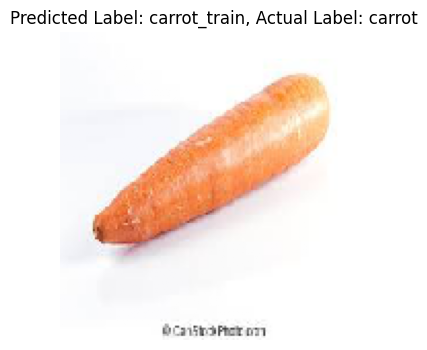

7


In [ ]:
# Testing the Model
test_image_path = '/content/drive/MyDrive/Big/img/carrot/carrot_121.jpg'

def generate_predictions(test_image_path, actual_label):

    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()
    print(predicted_label)

# call the function
generate_predictions(test_image_path, actual_label='carrot')

In [ ]:
# Using test dataset to evaluate the model
model.evaluate(test_image_generator)

71/71 [==============================] - 997s 14s/step - loss: 1.9843 - accuracy: 0.5544


[1.9842758178710938, 0.554444432258606]

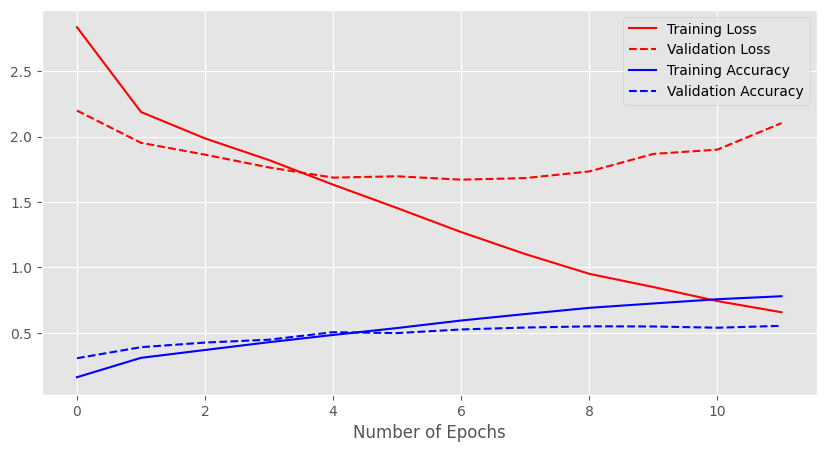

In [ ]:
# Train and validation loss and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

1/1 [==============================] - 0s 153ms/step
Confidence that the image is a Bean: 6.976863741874695%
Confidence that the image is a Bitter_Gourd: 6.223747879266739%
Confidence that the image is a Bottle_Gourd: 7.072640210390091%
Confidence that the image is a Brinjal: 5.730841681361198%
Confidence that the image is a Broccoli: 7.66676738858223%
Confidence that the image is a Cabbage: 6.312496215105057%
Confidence that the image is a Capsicum: 7.581553608179092%
Confidence that the image is a Carrot: 7.751056551933289%
Confidence that the image is a Cauliflower: 4.7997720539569855%
Confidence that the image is a Cucumber: 5.752358958125114%
Confidence that the image is a Papaya: 6.753486394882202%
Confidence that the image is a Potato: 7.3941670358181%
Confidence that the image is a Pumpkin: 5.428909137845039%
Confidence that the image is a Radish: 7.55123496055603%
Confidence that the image is a Tomato: 7.0041075348854065%


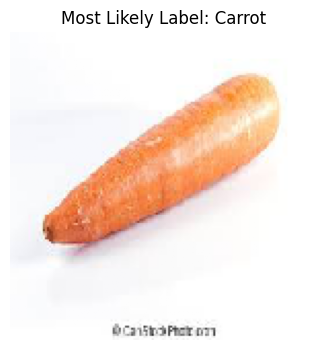

In [ ]:
# Load the image and prepare it for prediction
test_img = image.load_img(test_image_path, target_size=(150, 150))
test_img_arr = image.img_to_array(test_img)/255.0
test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

# Make Predictions
predicted_probabilities = model.predict(test_img_input)[0]   # Get predicted probabilities for all classes

# Get labels and corresponding probabilities
for i in range(len(predicted_probabilities)):
    predicted_vegetable = class_map[i]
    confidence_percentage = predicted_probabilities[i]*100   # Convert probability to percentage
    print(f"Confidence that the image is a {predicted_vegetable}: {confidence_percentage}%")

# Display the image with the most likely label
predicted_label = np.argmax(predicted_probabilities)  # Get the index of the max probability
predicted_vegetable = class_map[predicted_label]
plt.figure(figsize=(4, 4))
plt.imshow(test_img_arr)
plt.title("Most Likely Label: {}".format(predicted_vegetable))
plt.grid()
plt.axis('off')
plt.show()
